**Part-1**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

In [ ]:
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Forward selection

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
#This above function accepts data, target variable, and significance level as arguments and returns the final list of significant features based on p-values through forward selection

In [ ]:
forward_selection(X,y)

Implementing Forward selection using built-in functions in Python

In [ ]:
#mlxtend library contains built-in implementation for most of the wrapper methods based feature selection techniques. SequentialFeatureSelector() function comes with various combinations of feature selection techniques
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
SequentialFeatureSelector() function accepts the following major arguments :

LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

forward and floating arguments for different flavors of wrapper methods, here, forward = True and floating = False are for forward selection technique.

The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

cv argument is for k-fold cross-validation.

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

Backward elimination

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features
#This above function returns the final list of significant features based on p-values through backward elimination.

Implementing Backward elimination using built-in functions in Python

In [ ]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

In [ ]:
#Here we are directly using the optimal value of k_features argument in both forward selection and backward elimination. In order to find out the optimal number of significant features, we can use the hit and trial method for different values of k_features and make the final decision by plotting it against the model performance.

In [ ]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=(3, 11),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

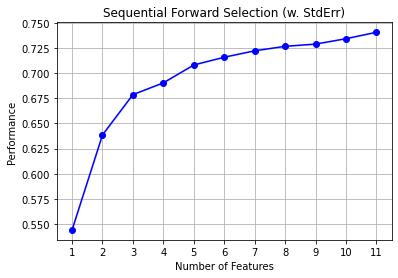

In [ ]:
#The same visualization can be achieved through plot_sequential_feature_selection()function available in mlxtend.plotting module.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
#Here, on the y-axis, the performance label indicates the R-squared values for the different numbers of features

Bi-directional elimination(Step-wise Selection)

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
#This above function returns the final list of significant features based on p-values through bi-directional elimination.

In [ ]:
stepwise_selection(X,y)

Implementing bi-directional elimination using built-in functions in Python

In [ ]:
#The same SequentialFeatureSelector()function can be used to perform backward elimination by enabling forward and floating arguments.
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

**Part-2**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))  

User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions download -c bnp-paribas-cardif-claims-management

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                

Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   

3 archives were successfully processed.


In [ ]:
m=pd.read_csv('train.csv')
m.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,...,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,...,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,...,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,...,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,B,2.230754,1.990131,B,2.643678,J,NaN,13.777666,10.574713,1.511063,4.949609,7.180722,5.655086e-01,1.166281,1.956521,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,6.320087,NaN,10.991098,NaN,NaN,NaN,NaN,NaN,NaN,6.414567,HIT,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,6.083151,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,A,NaN,T,G,14.097099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
m.shape

(114321, 133)

In [ ]:
#Data Preprocessing
#The following script imports the dataset and the required libraries, it then removes the non-numeric columns from the dataset and then divides the dataset into training and testing sets.
#Finally, all the columns with a correlation of greater than 0.8 are removed. 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

#paribas_data = pd.read_csv(r"E:\Datasets\paribas_data.csv", nrows=20000)
paribas_data = pd.read_csv(r"train.csv", nrows=20000)
paribas_data.shape

num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(paribas_data.select_dtypes(include=num_colums).columns)
paribas_data = paribas_data[numerical_columns]
paribas_data.shape

train_features, test_features, train_labels, test_labels = train_test_split(
    paribas_data.drop(labels=['target', 'ID'], axis=1),
    paribas_data['target'],
    test_size=0.2,
    random_state=41)

correlated_features = set()
correlation_matrix = paribas_data.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

train_features.shape, test_features.shape

((16000, 57), (4000, 57))

Implementing Step Forward Feature Selection in Python

In [ ]:
#To select the most optimal features, we will be using SequentialFeatureSelector function from the mlxtend library
#We will use the Random Forest Classifier to find the most optimal parameters. The evaluation criteria used will be ROC-AUC. The following script selects the 15 features from our dataset that yields best performance for random forest classifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=15,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [ ]:
#RandomForestClassifieras the estimator to the SequentialFeatureSelector function. The k_features specifies the number of features to select.
#The forward parameter, if set to True, performs step forward feature selection. The verbose parameter is used for logging the progress of the feature selector, the scoring parameter defines the performance evaluation criteria and finally, cv refers to cross-validation folds.

In [ ]:
#We created our feature selector, now we need to call the fit method on our feature selector and pass it the training and test sets
features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

In [ ]:
filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

Index(['v9', 'v10', 'v13', 'v14', 'v23', 'v26', 'v33', 'v34', 'v50', 'v58',
       'v69', 'v72', 'v102'],
      dtype='object')

In [ ]:
#Now to see the classification performance of the random forest algorithm using these 15 features
#we train our random forest algorithm on the 15 features that we selected using the step forward feature selection and then we evaluated the performance of our algorithm on the training and testing sets.
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))
#we train our random forest algorithm on the 15 features that we selected using the step forward feature selection and then we evaluated the performance of our algorithm on the training and testing sets
#You can see that the accuracy on training and test sets is pretty similar which means that our model is not overfitting.

Accuracy on training set: 0.7032837772774065
Accuracy on test set: 0.7072036238136323


Step Backwards Feature Selection in Python

In [ ]:
# The only change will be in the forward parameter of the SequentiaFeatureSelector class. In case of the step backwards feature selection, we will set this parameter to False
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=15,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

In [ ]:
#To see the feature selected as a result of step backwards elimination, execute the following script:

filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

In [ ]:
# evaluate the performance of our random forest classifier on the features selected as a result of step backwards feature selection
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

Exhaustive Feature Selection in Python

In [ ]:
#we will be using ExhaustiveFeatureSelector function from the mlxtend.feature_selection library. 
#The class has min_featuresand max_features attributes which can be used to specify the minimum and the maximum number of features in the combination.
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
           min_features=2,
           max_features=4,
           scoring='roc_auc',
           print_progress=True,
           cv=2)

In [ ]:
#call the fit method on our feature selector and pass it the training and test sets
features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

In [ ]:
#To see the feature selected as a result of step backwards elimination, execute the following script:
filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

In [ ]:
#Finally, to see the performance of random forest classifier on the features selected as a result of exhaustive feature selection.
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

**Part-3**

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 30.7MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.1MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.0MB/s]


In [ ]:
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Feature selection should be done after data preprocessing.
#Ideally  all the categorical variables should be encoded into numbers, so that we can assess how deterministic they are for target.
#Currently I will be dealling with numerical columns only.
colType = ['int64','float64']
#Select the columns which are either int64 or float64.
numCols=list(df.select_dtypes(include=colType).columns)
#Assigning numerical columns from df to data variable. We can use the same variable as well.
data=df[numCols]

In [ ]:
#Lets check the shape.
data.shape

(1460, 38)

In [ ]:
#Lets split the data in training set and test set.
X_train,X_test,y_train,y_test=train_test_split(data.drop('SalePrice',axis=1),data['SalePrice'],test_size=.2,random_state=1)
X_train.shape,X_test.shape

((1168, 37), (292, 37))

In [ ]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(X_train,0.8)
print('Correlated columns:',col)        

Correlated columns: {'GarageYrBlt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'}


In [ ]:
#remove correlated columns
X_train.drop(columns=col,axis=1,inplace=True)
X_test.drop(columns=col,axis=1,inplace=True)
#lets check the shape of training set and test set.
X_train.shape,X_test.shape

((1168, 33), (292, 33))

In [ ]:
#Filling null values with 0.
X_train.fillna(0,inplace=True)

In [ ]:
#Checking if there is null values.
X_train.isnull().sum().max()

0

Forward feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
model=sfs(RandomForestRegressor(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   21.7s finished

[2020-12-31 05:10:00] Features: 1/10 -- score: 0.6545721434957497[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   20.9s finished

[2020-12-31 05:10:21] Features: 2/10 -- score: 0.7095823983808033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   21.9s finished

[2020-12-31 05:10:43] Features: 3/10 -- score: 0.7304725446068938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.1s finished

[2020-12-31 05:11:06] Features: 4/10 -- score: 0.7400051391727093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   29.3s finished



SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [ ]:
#Get the selected feature index.
model.k_feature_idx_

(3, 4, 5, 7, 8, 9, 12, 15, 22, 23)

In [ ]:
#Get the column name for the selected feature.
model.k_feature_names_

('LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageCars')

Backward Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
backwardModel=sfs(RandomForestRegressor(),k_features=10,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
backwardModel.fit(np.array(X_train),y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  2.0min finished

[2020-12-31 05:55:27] Features: 32/10 -- score: 0.8432257441982525[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.9min finished

[2020-12-31 05:57:18] Features: 31/10 -- score: 0.8447757073715569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  1.8min finished

[2020-12-31 05:59:05] Features: 30/10 -- score: 0.8468480239665205[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished

[2020-12-31 06:00:44] Features: 29/10 -- score: 0.8502391989487116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:  1.5min finish

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [ ]:
#Get the selected feature index.
backwardModel.k_feature_idx_

(2, 3, 4, 5, 6, 9, 12, 15, 21, 23)

In [ ]:
#Get the column name for the selected feature.
X_train.columns[list(backwardModel.k_feature_idx_)]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars'],
      dtype='object')

Exhaustive Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
emodel=efs(RandomForestRegressor(),min_features=1,max_features=5,scoring='r2',n_jobs=-1)
miniData=X_train[X_train.columns[list(backwardModel.k_feature_idx_)]]
emodel.fit(np.array(miniData),y_train)

Features: 637/637

ExhaustiveFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [ ]:
#Get the selected feature index.
emodel.best_idx_

(1, 2, 4, 5, 7)

In [ ]:
#Get the column name for the selected feature.
miniData.columns[list(emodel.best_idx_)]

Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'GrLivArea'], dtype='object')

**Part-4---Sample Code For all**

Step forward feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression,LogisticRegression
#FOR REGRESSION MODEL
feature_select = SequentialFeatureSelector(LinearRegression(),
                                           k_features=,
                                           forward=True,
                                           floating=False,
                                           scoring='r2',
                                           cv=)
feature_select.fit(x,y)
feature_select.k_feature_names_
#FOR CLASSIFICATION MODEL
feature_select = SequentialFeatureSelector(LogisticRegression(),
                                           k_features=,
                                           forward=True,
                                           floating=False,
                                           scoring='roc_auc',
                                           cv=)
feature_select.fit(x,y)
feature_select.k_feature_names_

Step backwards feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression,LogisticRegression
#FOR REGRESSION MODEL
feature_select = SequentialFeatureSelector(LinearRegression(),
                                           k_features=,
                                           forward=False,
                                           floating=False,
                                           scoring='r2',
                                           cv=)
feature_select.fit(x,y)
feature_select.k_feature_names_
#FOR CLASSIFICATION MODEL
feature_select = SequentialFeatureSelector(LogisticRegression(),
                                           k_features=,
                                           forward=False,
                                           floating=False,
                                           scoring='roc_auc',
                                           cv=)
feature_select.fit(x,y)
feature_select.k_feature_names_

Exhaustive feature selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression,LogisticRegression
#FOR REGRESSION MODELS
feature_select = ExhaustiveFeatureSelector(LinearRegression(),             
                                           min_features=,
                                           max_features=,
                                           scoring='R2',
                                           print_progress=True,
                                           cv=5)
feature_select = feature_select.fit(X, y)
print('Best accuracy score: %.2f' %feature_select.best_score_) 
print('Best subset (indices):', feature_select.best_idx_) 
print('Best subset (name):', feature_select.best_feature_names_)
#FOR CLASSIFICATION MODELS
feature_select = ExhaustiveFeatureSelector(LogisticRegression(),             
                                           min_features=,
                                           max_features=,
                                           scoring='roc_auc',
                                           print_progress=True,
                                           cv=5)
feature_select = feature_select.fit(X, y)
print('Best accuracy score: %.2f' %feature_select.best_score_) 
print('Best subset (indices):', feature_select.best_idx_) 
print('Best subset (name):', feature_select.best_feature_names_)